In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns

# Titanic 데이터 불러오기
#df = sns.load_dataset('titanic')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/Kuggle_Homework/tested.csv')
# 1. 데이터 로드 및 기본 정보 확인
# CSV 파일 불러오기


In [3]:
# 피처 추출 (독립변수 확인해보기)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# 데이터프레임의 상위 5개 행을 출력하여 데이터의 기본 구조를 확인하시오.
# (빈칸: df.______())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


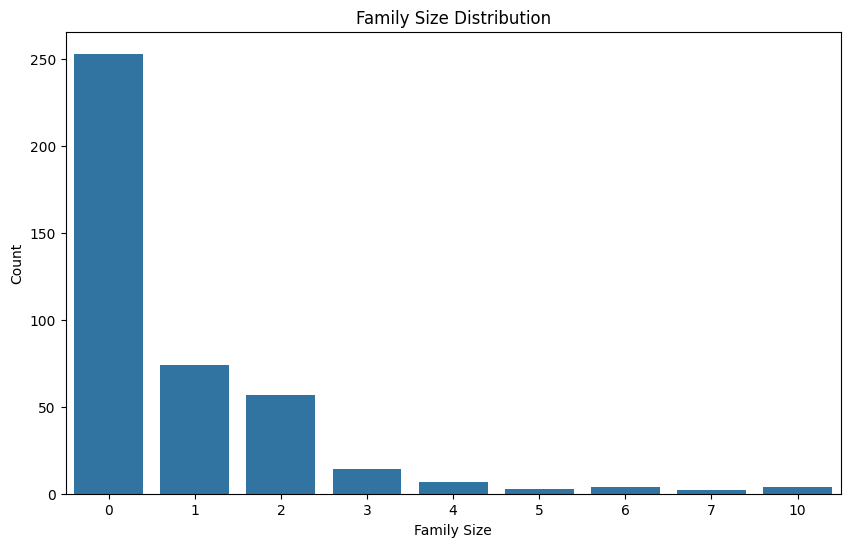

In [5]:
# 2. 피처 엔지니어링 1: 가족 수 변수 생성

family_size = df['SibSp'] + df['Parch']
df['Family_Size'] = family_size

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', data=df)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()
# SibSp (형제자매 / 배우자 수) + Parch (부모 / 자녀 수) 값을 더하여 새로운 가족 수 변수를 만드시오.
# 변수 이름은 'Family_Size'로 지정하세요.

# Family_Size 변수의 분포를 확인하고, 전체적인 분포가 어떤지 설명하시오.
# -> 점점 줄어드는 추세


In [6]:
# 3. 피처 엔지니어링 2: 이름에서 호칭 추출

df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
print(df['Title'].head())
print(df['Title'].value_counts())

# 이름(`Name`)에서 Mr, Mrs, Miss 등 호칭을 추출하여 새로운 'Title' 변수를 생성하세요.
# 힌트: 이름 문자열에서 콤마(,)와 점(.) 사이의 텍스트를 추출하면 됨.
# (빈칸: df['Title'] = df['Name'].str.extract('_____', expand=False))

# 생성된 Title 변수의 상위 5개 값을 출력하고, 다양한 호칭이 어떻게 구성되어 있는지 확인하세요.


0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object
Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [7]:
# 4. 피처 엔지니어링 3: 나이 그룹화
# Age 변수의 결측값을 중간값으로 채우고, 나이 범주를 나눠서 'Age_Group' 변수를 생성하세요.
# 예: 0-12 (Child), 13-18 (Teenager), 19-35 (Young_Adult), 36-60 (Adult), 60 이상 (Senior)
# (빈칸: df['Age'] = df['Age'].fillna(df['______.median()']))

# 나이를 그룹화하는 함수 작성
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age_Group'] = df['Age'].apply(lambda x: 'Child' if x <= 12 else ('Teenager' if x <= 18 else ('Young_Adult' if x <= 35 else ('Adult' if x <= 60 else 'Senior'))))
#print(df['Age_Group'].head())
print(df['Age_Group'].value_counts())

# age_group 함수를 사용하여 새로운 'Age_Group' 변수 생성
# (빈칸: df['Age_Group'] = df['Age'].apply(____))

# 생성된 Age_Group 변수의 분포를 확인하세요.
# (빈칸: print(df['______'].value_counts()))


Age_Group
Young_Adult    259
Adult           94
Teenager        29
Child           25
Senior          11
Name: count, dtype: int64


In [8]:
# 5. 피처 엔지니어링 4: 요금 범주화
# Fare 변수를 기준으로 값이 높은 승객과 낮은 승객을 구분하기 위해 4개의 구간으로 나누어 'Fare_Bin' 변수를 생성하세요.
# 힌트: pd.qcut() 함수를 사용하여 구간 나누기
# (빈칸: df['Fare_Bin'] = pd.qcut(df['____'], _____))
df['Fare_Bin'] = pd.qcut(df['Fare'], 4)
print(df['Fare_Bin'].value_counts())

# Fare_Bin 변수의 빈도를 출력하고, 값의 분포를 확인하세요.
# (빈칸: print(df['______'].value_counts()))


Fare_Bin
(-0.001, 7.896]    114
(14.454, 31.5]     105
(31.5, 512.329]    102
(7.896, 14.454]     96
Name: count, dtype: int64


In [9]:
# 6. 피처 엔지니어링 5: 객실 여부
# Cabin 변수가 결측인 경우와 아닌 경우를 구분하여 'Cabin_Known' 변수를 생성하세요.
# Cabin 값이 존재하면 1, 결측이면 0으로 설정하세요.
# (빈칸: df['Cabin_Known'] = df['Cabin'].notna().astype(____))
df['Cabin_Known'] = df['Cabin'].notna().astype(int)
print(df['Cabin_Known'].value_counts())

# 생성된 Cabin_Known 변수의 빈도를 출력하고, 객실 여부와 생존율 간의 관계를 분석하세요.
# (빈칸: print(df['______'].value_counts()))


Cabin_Known
0    327
1     91
Name: count, dtype: int64


In [10]:
# 7. 피처 엔지니어링 6: 승선 지역
# 'Embarked' 변수를 더미 변수로 변환하여 승선 지역(S, C, Q)을 기준으로 각각의 더미 변수를 생성하세요.
# (빈칸: df = pd.get_dummies(df, columns=['____'], drop_first=True))
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df.head())
# 변환된 데이터프레임의 상위 5개 행을 출력하여 더미 변수 생성 결과를 확인하세요.
# (빈칸: df.______())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin  Family_Size Title    Age_Group         Fare_Bin  \
0   330911   7.8292   NaN            0    Mr  Young_Adult  (-0.001, 7.896]   
1   363272   7.0000   NaN            1   Mrs        Adult  (-0.001, 7.896]   
2   240276   9.6875   NaN            0    Mr       Senior  (7.896, 14.454]

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Family_Size,Title,Age_Group,Fare_Bin,Cabin_Known,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Mr,Young_Adult,Low,0,True,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,1,Mrs,Adult,Low,0,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Mr,Senior,Mid,0,True,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,Mr,Young_Adult,Mid,0,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2,Mrs,Young_Adult,Mid,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,0,Mr,Young_Adult,Mid,0,False,True
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,0,Dona,Adult,Very_High,1,False,False
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,Mr,Adult,Low,0,False,True
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,0,Mr,Young_Adult,Mid,0,False,True


## 문제

### 1. 피처엔지니어링을 통해 기대할 수 있는 효과는 무엇인지 설명하시오.
1. 모델 성능 향상 - 기존 변수를 변환함으로써 모델이 데이터를 더 잘 이해하고 학습할 수 있음. 또한 적절한 feature를 추가함으로써 성능 지표가 개선될 수 있음.
2. 차원의 저주 극복 - 불필요한 feature를 제거하거나 중요 feature만을 선택
3. 학습 속도 개선 - 학습 데이터의 크기를 줄임으로써 학습 시간 단축

### 2. 새로 생성한 변수에 대해 간단히 설명하고 모델의 성능이 향상된다면 그 이유가 무엇일지 설명하시오.
1. Binning
  - 연속형 변수를 구간으로 나누어 범주형 변수로 변환하는 방법.   
  - 데이터의 작은 변동이나 노이즈 무시될 수 있고, 연속형 변수의 구간이 의미있는 범위로 해석될 수 있음.
2. One-hot encoding (label encoding)
  - 텍스트/범주형 데이터를 숫자로 변환하는 방법
  - 모델이 해당 데이터를 다룰 수 있게 되고 수치적으로 처리할 수 있음.
3. Dummy variables
  - 범주형 변수를 하나의 이진 변수로 변환해 모델에 입력하는 방법
  - 모델이 범주형 데이터를 해석할 수 있게 되고, 예측 성능을 향상시킬 수 있음.
